In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Getting the dataset
Working with the fashion MNIST dataset 

In [3]:
# Getting the training data
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Dictionary of the classes in the dataset

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

PyTorch by default takes the batch size, **color channel** first then the height and width of the image 

In [8]:
image.shape

torch.Size([1, 28, 28])

In [9]:
label

9

(-0.5, 27.5, 27.5, -0.5)

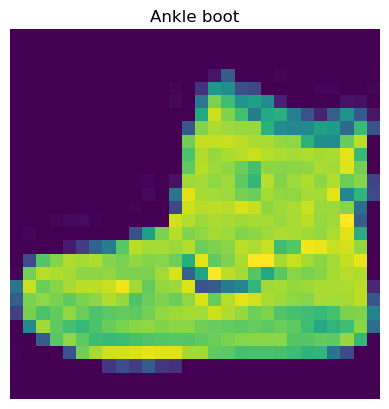

In [10]:
plt.imshow(image.squeeze())
plt.title('Ankle boot')
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

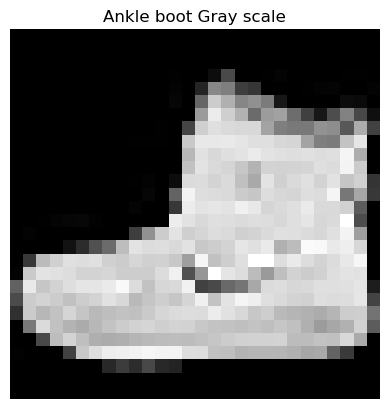

In [11]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title('Ankle boot Gray scale')
plt.axis(False)

### Visualizing the images in the dataset randomly

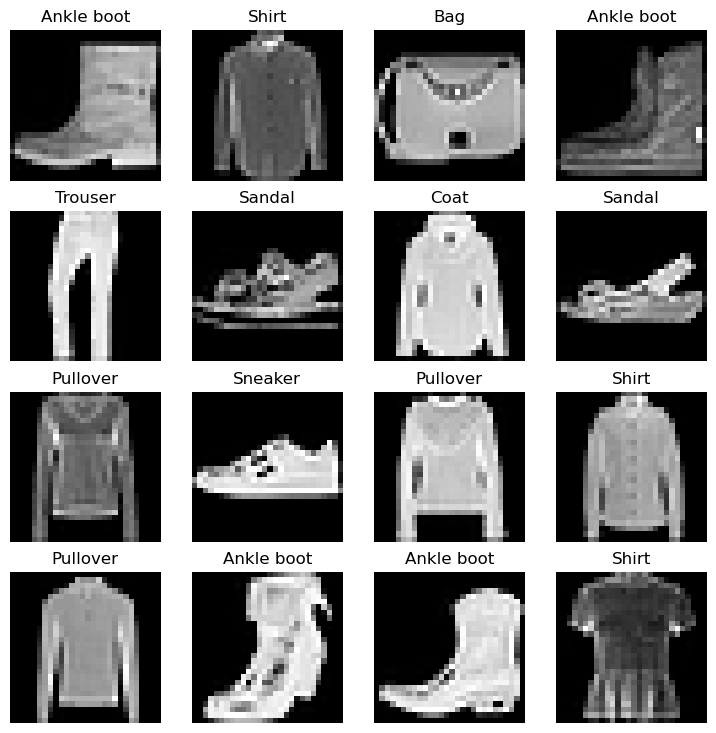

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare DataLoader 

Breaking the entire dataset to batches for computationally efficiency and updating the parameters per batch.

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader( dataset = train_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True
                                )

test_dataloader = DataLoader( dataset = test_data,
                               batch_size = BATCH_SIZE,
                               shuffle = False
                                )

In [15]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x24528fc0c40>,
 <torch.utils.data.dataloader.DataLoader at 0x24528fc0ac0>)

In [16]:
print(len(train_dataloader))
print(len(test_dataloader))

1875
313


In [17]:
train_features_batch, train_label_batch = next(iter(train_dataloader))

train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
flatten = nn.Flatten()
x = train_features_batch[0]

output = flatten(x)
output.shape # Color channel, height*width

torch.Size([1, 784])

In [19]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape , out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV0(input_shape = 784,
                              hidden_units = 10,
                              output_shape = 10)

model_1

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup loss, optimizer and evaluation metrics


In [21]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), 
                              lr = 0.1)

acc = Accuracy(task ='Multiclass', num_classes = 10)

### Finding out how long it took the model to train 

In [22]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Total train time: {total_time:.3f} seconds")
    return total_time

In [23]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end= end_time, device = 'cpu')

Total train time: 0.000 seconds


8.109999998850981e-05

### Train/Test loop

In [67]:
# Import tqdm for progress bar 
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n------")
    train_loss = 0 # Calculating train loss per batch
    
    # looping through training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_1.train()
        
        y_pred = model_1(X)
        
        # Loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")
            
            # Divide total train loss by length of train dataloader 
            # To find the average loss per epoch
            
        train_loss /= len(train_dataloader)
            
        # Testing the model 

        test_loss, test_acc = 0, 0
        model_1.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                test_pred = model_1(X)            
                test_loss += loss_fn(test_pred, y)
                test_acc += acc(test_pred.argmax(dim = 1), y)
            
            # Calculate the average test loss per batch
            test_loss /= len(test_dataloader)
            
            # Calculate the average test loss per batch
            test_acc /= len(test_dataloader)
        
        print(f"\n Train loss: {train_loss} | Test loss: {test_loss:.4f}  | Test acc: {test_acc:.4f}")
        
# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_1.parameters()).device()))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------
Looked at 0/ 60000 samples

 Train loss: 0.0012621207861229777 | Test loss: 16.7300  | Test acc: 0.1893

 Train loss: 0.008124697022140026 | Test loss: 13.4469  | Test acc: 0.1284

 Train loss: 0.006923175882548094 | Test loss: 24.7402  | Test acc: 0.1001

 Train loss: 0.013110530562698841 | Test loss: 17.8378  | Test acc: 0.1006

 Train loss: 0.009357682429254055 | Test loss: 15.5976  | Test acc: 0.1079

 Train loss: 0.007538660895079374 | Test loss: 13.7783  | Test acc: 0.2625

 Train loss: 0.007954972796142101 | Test loss: 10.9160  | Test acc: 0.2366

 Train loss: 0.006317449267953634 | Test loss: 6.9505  | Test acc: 0.2848

 Train loss: 0.004096081014722586 | Test loss: 6.9715  | Test acc: 0.2423

 Train loss: 0.00442467350512743 | Test loss: 8.2757  | Test acc: 0.3282

 Train loss: 0.004629870411008596 | Test loss: 4.8531  | Test acc: 0.4342

 Train loss: 0.002266234252601862 | Test loss: 6.2149  | Test acc: 0.3846

 Train loss: 0.0035230943467468023 | Test loss: 4.


 Train loss: 0.00045692408457398415 | Test loss: 1.0019  | Test acc: 0.7495

 Train loss: 0.00042540475260466337 | Test loss: 1.0921  | Test acc: 0.7165

 Train loss: 0.00024345074780285358 | Test loss: 1.2901  | Test acc: 0.6548

 Train loss: 0.0008879187516868114 | Test loss: 1.1088  | Test acc: 0.6936

 Train loss: 0.0008356396574527025 | Test loss: 1.1140  | Test acc: 0.7008

 Train loss: 0.00066751689882949 | Test loss: 1.4098  | Test acc: 0.6566

 Train loss: 0.000854811049066484 | Test loss: 1.3864  | Test acc: 0.6495

 Train loss: 0.0006789177423343062 | Test loss: 1.1192  | Test acc: 0.6834

 Train loss: 0.0008319393382407725 | Test loss: 0.8880  | Test acc: 0.7521

 Train loss: 0.00024338813091162592 | Test loss: 1.0351  | Test acc: 0.7183

 Train loss: 0.000844989437609911 | Test loss: 1.0899  | Test acc: 0.6984

 Train loss: 0.0004159903328400105 | Test loss: 1.0701  | Test acc: 0.7020

 Train loss: 0.0007728479104116559 | Test loss: 1.0062  | Test acc: 0.7058

 Train loss


 Train loss: 0.00017046109132934362 | Test loss: 0.8435  | Test acc: 0.7750

 Train loss: 0.0002381417143624276 | Test loss: 0.8827  | Test acc: 0.7678

 Train loss: 0.0006230907165445387 | Test loss: 0.9693  | Test acc: 0.7552

 Train loss: 0.00048239051830023527 | Test loss: 0.9315  | Test acc: 0.7547

 Train loss: 0.0005882276454940438 | Test loss: 0.8122  | Test acc: 0.7717

 Train loss: 0.0001930704602273181 | Test loss: 0.7739  | Test acc: 0.7786

 Train loss: 0.0006133306305855513 | Test loss: 0.7502  | Test acc: 0.7841

 Train loss: 0.0003014466492459178 | Test loss: 0.7592  | Test acc: 0.7847

 Train loss: 0.00026709449593909085 | Test loss: 0.8554  | Test acc: 0.7550

 Train loss: 0.0006826803437434137 | Test loss: 0.8330  | Test acc: 0.7534

 Train loss: 0.0003817073302343488 | Test loss: 0.8760  | Test acc: 0.7367

 Train loss: 0.0003133418213110417 | Test loss: 0.9634  | Test acc: 0.7111

 Train loss: 0.0007490580319426954 | Test loss: 0.8316  | Test acc: 0.7280

 Train l


 Train loss: 0.0009700926602818072 | Test loss: 1.0939  | Test acc: 0.7184

 Train loss: 0.0008057935629040003 | Test loss: 0.8736  | Test acc: 0.7554

 Train loss: 0.00038808814133517444 | Test loss: 1.0769  | Test acc: 0.7084

 Train loss: 0.00033895025262609124 | Test loss: 1.3223  | Test acc: 0.6655

 Train loss: 0.0008529296610504389 | Test loss: 1.2521  | Test acc: 0.6895

 Train loss: 0.0004325333284214139 | Test loss: 1.5908  | Test acc: 0.6562

 Train loss: 0.0009367223829030991 | Test loss: 1.2733  | Test acc: 0.7000

 Train loss: 0.0007642197888344526 | Test loss: 0.8988  | Test acc: 0.7602

 Train loss: 0.0005761075881309807 | Test loss: 0.8996  | Test acc: 0.7612

 Train loss: 0.0004942871164530516 | Test loss: 0.9408  | Test acc: 0.7366

 Train loss: 0.0009423309238627553 | Test loss: 0.9431  | Test acc: 0.7246

 Train loss: 0.00034747470635920763 | Test loss: 0.8676  | Test acc: 0.7653

 Train loss: 0.0006028579082340002 | Test loss: 0.8504  | Test acc: 0.7660

 Train l


 Train loss: 0.0012982129119336605 | Test loss: 3.1339  | Test acc: 0.6832

 Train loss: 0.0019010597607120872 | Test loss: 3.0861  | Test acc: 0.6724

 Train loss: 0.0015059313736855984 | Test loss: 3.3409  | Test acc: 0.6746

 Train loss: 0.0015069895889610052 | Test loss: 2.9518  | Test acc: 0.6999

 Train loss: 0.0017575387610122561 | Test loss: 3.0714  | Test acc: 0.6775

 Train loss: 0.0015799235552549362 | Test loss: 4.1554  | Test acc: 0.6507

 Train loss: 0.0035936019849032164 | Test loss: 4.6873  | Test acc: 0.6134

 Train loss: 0.0035145985893905163 | Test loss: 2.9621  | Test acc: 0.6722

 Train loss: 0.0013911022106185555 | Test loss: 3.6716  | Test acc: 0.6731

 Train loss: 0.0018011396750807762 | Test loss: 6.2303  | Test acc: 0.6123

 Train loss: 0.0019422731129452586 | Test loss: 6.6313  | Test acc: 0.6280

 Train loss: 0.0012758029624819756 | Test loss: 6.2192  | Test acc: 0.6687

 Train loss: 0.0024536254350095987 | Test loss: 4.9957  | Test acc: 0.6629

 Train loss


 Train loss: 0.0027684196829795837 | Test loss: 6.7518  | Test acc: 0.6371

 Train loss: 0.0021955547854304314 | Test loss: 6.9477  | Test acc: 0.6244

 Train loss: 0.003407633863389492 | Test loss: 4.0519  | Test acc: 0.7087

 Train loss: 0.0013488417025655508 | Test loss: 2.9400  | Test acc: 0.7625

 Train loss: 0.000685904873535037 | Test loss: 4.1880  | Test acc: 0.7097

 Train loss: 0.002207714132964611 | Test loss: 5.3672  | Test acc: 0.6660

 Train loss: 0.0012743870029225945 | Test loss: 5.6957  | Test acc: 0.6791

 Train loss: 0.0026926822029054165 | Test loss: 6.1400  | Test acc: 0.6053

 Train loss: 0.003195414552465081 | Test loss: 3.3038  | Test acc: 0.7324

 Train loss: 0.0017240369925275445 | Test loss: 5.6464  | Test acc: 0.6692

 Train loss: 0.0019647248554974794 | Test loss: 9.4139  | Test acc: 0.5733

 Train loss: 0.0024336869828402996 | Test loss: 6.9244  | Test acc: 0.6422

 Train loss: 0.003639552276581526 | Test loss: 4.7587  | Test acc: 0.7001

 Train loss: 0.0


 Train loss: 0.000409277796279639 | Test loss: 2.4660  | Test acc: 0.7118

 Train loss: 0.001774374395608902 | Test loss: 2.3530  | Test acc: 0.7244

 Train loss: 0.0012039606226608157 | Test loss: 2.9599  | Test acc: 0.6821

 Train loss: 0.003026555525138974 | Test loss: 3.0754  | Test acc: 0.6641

 Train loss: 0.0017693060217425227 | Test loss: 2.5805  | Test acc: 0.6874

 Train loss: 0.0014063541311770678 | Test loss: 3.0750  | Test acc: 0.6791

 Train loss: 0.0011943666031584144 | Test loss: 2.8302  | Test acc: 0.7096

 Train loss: 0.0007730142679065466 | Test loss: 2.4835  | Test acc: 0.7185

 Train loss: 0.000525232928339392 | Test loss: 2.4238  | Test acc: 0.7163

 Train loss: 0.0013009578688070178 | Test loss: 3.4751  | Test acc: 0.6388

 Train loss: 0.0014120350824669003 | Test loss: 3.0091  | Test acc: 0.6774

 Train loss: 0.0010306912008672953 | Test loss: 2.6737  | Test acc: 0.7034

 Train loss: 0.0010697755496948957 | Test loss: 2.3687  | Test acc: 0.7313

 Train loss: 0.


 Train loss: 0.0008839473593980074 | Test loss: 2.4599  | Test acc: 0.6542

 Train loss: 0.0014907317236065865 | Test loss: 2.5045  | Test acc: 0.6587

 Train loss: 0.001970743527635932 | Test loss: 2.5801  | Test acc: 0.6762

 Train loss: 0.0015525545459240675 | Test loss: 2.2842  | Test acc: 0.7047

 Train loss: 0.0019157391507178545 | Test loss: 2.8180  | Test acc: 0.6786

 Train loss: 0.0020690872333943844 | Test loss: 2.9353  | Test acc: 0.6631

 Train loss: 0.0009221364744007587 | Test loss: 2.1472  | Test acc: 0.7197

 Train loss: 0.0013050873531028628 | Test loss: 1.6933  | Test acc: 0.7507

 Train loss: 0.0007798118167556822 | Test loss: 1.6432  | Test acc: 0.7675

 Train loss: 0.000985670369118452 | Test loss: 2.2142  | Test acc: 0.7272

 Train loss: 0.0002566274197306484 | Test loss: 3.0363  | Test acc: 0.6937

 Train loss: 0.0002450975007377565 | Test loss: 4.6269  | Test acc: 0.6315

 Train loss: 0.003793043550103903 | Test loss: 2.8244  | Test acc: 0.7039

 Train loss: 0


 Train loss: 0.00164507154840976 | Test loss: 1.6233  | Test acc: 0.7291

 Train loss: 0.0005948232719674706 | Test loss: 1.9167  | Test acc: 0.6910

 Train loss: 0.0008796871406957507 | Test loss: 1.9502  | Test acc: 0.6815

 Train loss: 0.0007075899047777057 | Test loss: 1.7703  | Test acc: 0.7030

 Train loss: 0.0006384658045135438 | Test loss: 1.7886  | Test acc: 0.7183

 Train loss: 0.0008654978591948748 | Test loss: 1.7097  | Test acc: 0.7263

 Train loss: 0.0006063984474167228 | Test loss: 1.2770  | Test acc: 0.7714

 Train loss: 0.00033155755954794586 | Test loss: 1.2303  | Test acc: 0.7791

 Train loss: 0.0008478799136355519 | Test loss: 1.2289  | Test acc: 0.7742

 Train loss: 0.0009038809221237898 | Test loss: 1.3191  | Test acc: 0.7496

 Train loss: 0.0008425147971138358 | Test loss: 1.3580  | Test acc: 0.7346

 Train loss: 0.0005984154413454235 | Test loss: 1.7171  | Test acc: 0.6837

 Train loss: 0.000995929935015738 | Test loss: 1.6854  | Test acc: 0.7011

 Train loss: 


 Train loss: 0.0005169599899090827 | Test loss: 1.4859  | Test acc: 0.7529

 Train loss: 0.001088857650756836 | Test loss: 1.1093  | Test acc: 0.7963

 Train loss: 0.0004468067199923098 | Test loss: 1.5392  | Test acc: 0.7627

 Train loss: 0.000586304406169802 | Test loss: 2.1677  | Test acc: 0.7318

 Train loss: 0.0005023577832616866 | Test loss: 2.0332  | Test acc: 0.7383

 Train loss: 0.0005752818542532623 | Test loss: 1.6426  | Test acc: 0.7569

 Train loss: 0.0008122530998662114 | Test loss: 1.3464  | Test acc: 0.7793

 Train loss: 0.0007270500645972788 | Test loss: 1.4891  | Test acc: 0.7616

 Train loss: 0.00037315735244192183 | Test loss: 2.0521  | Test acc: 0.7226

 Train loss: 0.000525272567756474 | Test loss: 2.4431  | Test acc: 0.7059

 Train loss: 0.000829437340144068 | Test loss: 2.4657  | Test acc: 0.7089

 Train loss: 0.0011386714177206159 | Test loss: 2.2879  | Test acc: 0.7140

 Train loss: 0.001410316675901413 | Test loss: 1.7637  | Test acc: 0.7025

 Train loss: 0.


 Train loss: 0.0005330966669134796 | Test loss: 1.4010  | Test acc: 0.7501

 Train loss: 0.0004384852363727987 | Test loss: 1.4484  | Test acc: 0.7499

 Train loss: 0.0004013266589026898 | Test loss: 1.5690  | Test acc: 0.7438

 Train loss: 0.0012723557883873582 | Test loss: 1.6459  | Test acc: 0.7369

 Train loss: 0.0008941369014792144 | Test loss: 1.6649  | Test acc: 0.7296

 Train loss: 0.0003167919348925352 | Test loss: 1.6373  | Test acc: 0.7323

 Train loss: 0.000725907098967582 | Test loss: 1.5613  | Test acc: 0.7406

 Train loss: 0.0008921074331738055 | Test loss: 1.3480  | Test acc: 0.7630

 Train loss: 0.0010107617126777768 | Test loss: 1.5764  | Test acc: 0.7298

 Train loss: 0.0005833689356222749 | Test loss: 1.5934  | Test acc: 0.7214

 Train loss: 0.0009265989065170288 | Test loss: 1.4609  | Test acc: 0.7211

 Train loss: 0.0003382724244147539 | Test loss: 1.2925  | Test acc: 0.7378

 Train loss: 0.00040160564822144806 | Test loss: 1.1925  | Test acc: 0.7480

 Train loss


 Train loss: 0.002729998668655753 | Test loss: 3.5027  | Test acc: 0.6671

 Train loss: 0.0004151520552113652 | Test loss: 4.2031  | Test acc: 0.6727

 Train loss: 0.002318581333383918 | Test loss: 3.9974  | Test acc: 0.6938

 Train loss: 0.0017648092471063137 | Test loss: 4.9187  | Test acc: 0.6432

 Train loss: 0.0031224479898810387 | Test loss: 5.2700  | Test acc: 0.6247

 Train loss: 0.003472104901447892 | Test loss: 3.2023  | Test acc: 0.7107

 Train loss: 0.0016449957620352507 | Test loss: 2.6511  | Test acc: 0.7290

 Train loss: 0.0015311128227040172 | Test loss: 3.2309  | Test acc: 0.6937
Looked at 38400/ 60000 samples

 Train loss: 0.0010416777804493904 | Test loss: 3.8197  | Test acc: 0.6559

 Train loss: 0.002895517973229289 | Test loss: 3.6562  | Test acc: 0.6648

 Train loss: 0.0021050015930086374 | Test loss: 3.7073  | Test acc: 0.6761

 Train loss: 0.001197335310280323 | Test loss: 2.9050  | Test acc: 0.7382

 Train loss: 0.001778144738636911 | Test loss: 3.8055  | Test


 Train loss: 0.0028311796486377716 | Test loss: 7.0448  | Test acc: 0.6770

 Train loss: 0.0025178687646985054 | Test loss: 7.1059  | Test acc: 0.6474

 Train loss: 0.005048652179539204 | Test loss: 5.9060  | Test acc: 0.6936

 Train loss: 0.0034605171531438828 | Test loss: 6.2201  | Test acc: 0.6769

 Train loss: 0.0052428655326366425 | Test loss: 4.1395  | Test acc: 0.7143

 Train loss: 0.004176456481218338 | Test loss: 6.9500  | Test acc: 0.6596

 Train loss: 0.003993787802755833 | Test loss: 11.8885  | Test acc: 0.6270

 Train loss: 0.00529072992503643 | Test loss: 13.8525  | Test acc: 0.5762

 Train loss: 0.007866665720939636 | Test loss: 8.8357  | Test acc: 0.5915

 Train loss: 0.002309771254658699 | Test loss: 5.2635  | Test acc: 0.6462

 Train loss: 0.0016875391593202949 | Test loss: 6.8741  | Test acc: 0.6270

 Train loss: 0.0032621666323393583 | Test loss: 6.2984  | Test acc: 0.6431

 Train loss: 0.002252347068861127 | Test loss: 5.1040  | Test acc: 0.6678

 Train loss: 0.00


 Train loss: 0.0010868287645280361 | Test loss: 2.7295  | Test acc: 0.7524

 Train loss: 0.003166841808706522 | Test loss: 2.9981  | Test acc: 0.7407

 Train loss: 0.0002427496074233204 | Test loss: 3.7253  | Test acc: 0.7010

 Train loss: 0.0012967842631042004 | Test loss: 4.7834  | Test acc: 0.6621

 Train loss: 0.003543223487213254 | Test loss: 4.0436  | Test acc: 0.6799

 Train loss: 0.0018554194830358028 | Test loss: 3.7280  | Test acc: 0.6776

 Train loss: 0.0027724532410502434 | Test loss: 2.8836  | Test acc: 0.7243

 Train loss: 0.0005496304947882891 | Test loss: 3.3884  | Test acc: 0.7062

 Train loss: 0.0006859211716800928 | Test loss: 4.1378  | Test acc: 0.6806

 Train loss: 0.0003923270560335368 | Test loss: 4.5482  | Test acc: 0.6760

 Train loss: 0.0018463070737197995 | Test loss: 4.6208  | Test acc: 0.6944

 Train loss: 0.0015813683858141303 | Test loss: 4.6892  | Test acc: 0.6861

 Train loss: 0.001602456672117114 | Test loss: 4.4206  | Test acc: 0.7014

 Train loss: 0


 Train loss: 0.0038080832455307245 | Test loss: 3.1597  | Test acc: 0.7526

 Train loss: 0.000408864114433527 | Test loss: 3.1941  | Test acc: 0.7521

 Train loss: 0.0017962870188057423 | Test loss: 3.0601  | Test acc: 0.7481

 Train loss: 0.0001878932089312002 | Test loss: 3.2092  | Test acc: 0.7356

 Train loss: 0.0032414791639894247 | Test loss: 3.0940  | Test acc: 0.7167

 Train loss: 0.001753206946887076 | Test loss: 3.3014  | Test acc: 0.6911

 Train loss: 0.0014776657335460186 | Test loss: 3.2010  | Test acc: 0.6929

 Train loss: 0.0033032053615897894 | Test loss: 2.9705  | Test acc: 0.6954

 Train loss: 0.003614760935306549 | Test loss: 2.8439  | Test acc: 0.6899

 Train loss: 0.0005594975664280355 | Test loss: 2.8641  | Test acc: 0.7107

 Train loss: 0.0019300754647701979 | Test loss: 3.2785  | Test acc: 0.6879

 Train loss: 0.0017097503878176212 | Test loss: 2.7447  | Test acc: 0.7052

 Train loss: 0.0019067635294049978 | Test loss: 1.8403  | Test acc: 0.7598

 Train loss: 0


 Train loss: 0.001607099431566894 | Test loss: 3.7492  | Test acc: 0.6864

 Train loss: 0.0013589111622422934 | Test loss: 3.2343  | Test acc: 0.7029

 Train loss: 0.002551889978349209 | Test loss: 2.6777  | Test acc: 0.7149

 Train loss: 0.003039794974029064 | Test loss: 2.3191  | Test acc: 0.7372

 Train loss: 0.0011780825443565845 | Test loss: 2.5362  | Test acc: 0.7487

 Train loss: 0.002535001141950488 | Test loss: 3.5835  | Test acc: 0.7079

 Train loss: 0.0009010218200273812 | Test loss: 4.6060  | Test acc: 0.6734

 Train loss: 0.002572376513853669 | Test loss: 4.4041  | Test acc: 0.6868

 Train loss: 0.0022034526336938143 | Test loss: 3.4265  | Test acc: 0.7318

 Train loss: 0.0015338393859565258 | Test loss: 2.9990  | Test acc: 0.7454

 Train loss: 0.001086900825612247 | Test loss: 2.9370  | Test acc: 0.7507

 Train loss: 0.0009955315617844462 | Test loss: 2.9964  | Test acc: 0.7499

 Train loss: 0.0013844252098351717 | Test loss: 3.3885  | Test acc: 0.7172

 Train loss: 0.00


 Train loss: 0.0027094390243291855 | Test loss: 4.0085  | Test acc: 0.6697

 Train loss: 0.0011213585967198014 | Test loss: 3.1749  | Test acc: 0.6601

 Train loss: 0.003147626295685768 | Test loss: 2.7340  | Test acc: 0.6848

 Train loss: 0.0018499611178413033 | Test loss: 4.5133  | Test acc: 0.6246

 Train loss: 0.003472123062238097 | Test loss: 3.6697  | Test acc: 0.6718

 Train loss: 0.002437426010146737 | Test loss: 2.4134  | Test acc: 0.7123

 Train loss: 0.0021889901254326105 | Test loss: 2.3823  | Test acc: 0.7082

 Train loss: 0.0013358424184843898 | Test loss: 3.1198  | Test acc: 0.7106

 Train loss: 0.001288596191443503 | Test loss: 4.2362  | Test acc: 0.6668

 Train loss: 0.0019807268399745226 | Test loss: 4.6066  | Test acc: 0.6429

 Train loss: 0.0024220377672463655 | Test loss: 4.4215  | Test acc: 0.6213

 Train loss: 0.0018949871882796288 | Test loss: 4.4584  | Test acc: 0.6209

 Train loss: 0.00316299544647336 | Test loss: 5.1112  | Test acc: 0.5765

 Train loss: 0.00


 Train loss: 0.004779189359396696 | Test loss: 9.4206  | Test acc: 0.6744

 Train loss: 0.002519560744985938 | Test loss: 8.4127  | Test acc: 0.6976

 Train loss: 0.0025022064801305532 | Test loss: 8.1457  | Test acc: 0.7017

 Train loss: 0.0045996736735105515 | Test loss: 8.4495  | Test acc: 0.6859

 Train loss: 0.004585843533277512 | Test loss: 6.7376  | Test acc: 0.6962

 Train loss: 0.004624647554010153 | Test loss: 6.7076  | Test acc: 0.7240

 Train loss: 0.0038701887242496014 | Test loss: 7.4045  | Test acc: 0.7037

 Train loss: 0.002994913375005126 | Test loss: 6.8820  | Test acc: 0.6874

 Train loss: 0.0027242011856287718 | Test loss: 7.5262  | Test acc: 0.6757

 Train loss: 0.003504300257191062 | Test loss: 7.3540  | Test acc: 0.6838

 Train loss: 0.004185730125755072 | Test loss: 7.2964  | Test acc: 0.6924

 Train loss: 0.004178323317319155 | Test loss: 7.1766  | Test acc: 0.6764

 Train loss: 0.0023820686619728804 | Test loss: 6.3374  | Test acc: 0.6886

 Train loss: 0.0010


 Train loss: 0.0011464088456705213 | Test loss: 4.4618  | Test acc: 0.6827

 Train loss: 0.0012994292192161083 | Test loss: 4.0989  | Test acc: 0.6952

 Train loss: 0.0019736499525606632 | Test loss: 3.3915  | Test acc: 0.7164

 Train loss: 0.0020964399445801973 | Test loss: 2.8425  | Test acc: 0.7275

 Train loss: 0.0007394003332592547 | Test loss: 3.2089  | Test acc: 0.7057

 Train loss: 0.0013850316172465682 | Test loss: 3.0996  | Test acc: 0.7145

 Train loss: 0.0017689312808215618 | Test loss: 2.5686  | Test acc: 0.7561

 Train loss: 0.0007854588329792023 | Test loss: 2.6283  | Test acc: 0.7587

 Train loss: 0.0012346511939540505 | Test loss: 3.0987  | Test acc: 0.7591

 Train loss: 0.0006907981587573886 | Test loss: 4.1144  | Test acc: 0.7175

 Train loss: 0.0009788768365979195 | Test loss: 3.5151  | Test acc: 0.7561

 Train loss: 0.0017581938300281763 | Test loss: 3.0503  | Test acc: 0.7660

 Train loss: 0.0010364314075559378 | Test loss: 3.2096  | Test acc: 0.7446

 Train loss


 Train loss: 0.0017786826938390732 | Test loss: 5.2063  | Test acc: 0.6889

 Train loss: 0.00403405399993062 | Test loss: 5.3979  | Test acc: 0.6690

 Train loss: 0.0023769421968609095 | Test loss: 4.7735  | Test acc: 0.7058

 Train loss: 0.0022608244325965643 | Test loss: 4.5454  | Test acc: 0.7109

 Train loss: 0.00438452186062932 | Test loss: 5.1195  | Test acc: 0.7167

 Train loss: 0.002590823220089078 | Test loss: 5.7499  | Test acc: 0.7136

 Train loss: 0.002651065355166793 | Test loss: 5.8739  | Test acc: 0.6963

 Train loss: 0.003743134206160903 | Test loss: 5.1732  | Test acc: 0.7122

 Train loss: 0.0023869615979492664 | Test loss: 3.7938  | Test acc: 0.7396

 Train loss: 0.0013870281400159001 | Test loss: 3.2880  | Test acc: 0.7207

 Train loss: 0.0013615605421364307 | Test loss: 3.0663  | Test acc: 0.7282

 Train loss: 0.001050868071615696 | Test loss: 3.1160  | Test acc: 0.7251

 Train loss: 0.0011504263384267688 | Test loss: 3.3665  | Test acc: 0.7180

 Train loss: 0.0022


 Train loss: 0.001121998648159206 | Test loss: 4.2344  | Test acc: 0.6465

 Train loss: 0.001393214683048427 | Test loss: 3.8255  | Test acc: 0.6615

 Train loss: 0.0008265302749350667 | Test loss: 2.8569  | Test acc: 0.7004

 Train loss: 0.0011297616874799132 | Test loss: 2.1643  | Test acc: 0.7392

 Train loss: 0.0030680380295962095 | Test loss: 1.9500  | Test acc: 0.7603

 Train loss: 0.0002802897070068866 | Test loss: 2.9585  | Test acc: 0.7145

 Train loss: 0.0008819400100037456 | Test loss: 4.0269  | Test acc: 0.6807

 Train loss: 0.002288522431626916 | Test loss: 3.1926  | Test acc: 0.7288

 Train loss: 0.002186349593102932 | Test loss: 2.2585  | Test acc: 0.7598

 Train loss: 0.0012752303155139089 | Test loss: 2.5380  | Test acc: 0.7319

 Train loss: 0.002240988193079829 | Test loss: 2.4339  | Test acc: 0.7402

 Train loss: 0.0011044300626963377 | Test loss: 2.2723  | Test acc: 0.7647

 Train loss: 0.0011714487336575985 | Test loss: 2.3859  | Test acc: 0.7631

 Train loss: 0.0


 Train loss: 0.0013296811375766993 | Test loss: 2.8697  | Test acc: 0.7308

 Train loss: 0.0023012724705040455 | Test loss: 2.0256  | Test acc: 0.7593

 Train loss: 0.0018663140945136547 | Test loss: 1.6439  | Test acc: 0.7903

 Train loss: 0.0007300719153136015 | Test loss: 1.6436  | Test acc: 0.7929

 Train loss: 0.0016050089616328478 | Test loss: 1.9474  | Test acc: 0.7572

 Train loss: 0.00016091714496724308 | Test loss: 2.8562  | Test acc: 0.6918

 Train loss: 0.0017670653760433197 | Test loss: 3.1569  | Test acc: 0.6568

 Train loss: 0.002351505681872368 | Test loss: 2.1645  | Test acc: 0.7207

 Train loss: 0.0013751185033470392 | Test loss: 3.2186  | Test acc: 0.6769

 Train loss: 0.0017367193941026926 | Test loss: 3.7780  | Test acc: 0.6509

 Train loss: 0.0018175733275711536 | Test loss: 4.1834  | Test acc: 0.6165

 Train loss: 0.0012322207912802696 | Test loss: 3.3626  | Test acc: 0.6618

 Train loss: 0.001779784681275487 | Test loss: 2.5205  | Test acc: 0.7387

 Train loss:


 Train loss: 0.0019357952987775207 | Test loss: 5.0104  | Test acc: 0.6858

 Train loss: 0.0023286163341253996 | Test loss: 6.3405  | Test acc: 0.6575

 Train loss: 0.00439222389832139 | Test loss: 6.5752  | Test acc: 0.6786

 Train loss: 0.0028032097034156322 | Test loss: 5.4367  | Test acc: 0.6911

 Train loss: 0.0021354281343519688 | Test loss: 4.1332  | Test acc: 0.7357

 Train loss: 0.0014164176536723971 | Test loss: 5.6241  | Test acc: 0.6888

 Train loss: 0.004814777057617903 | Test loss: 4.8690  | Test acc: 0.7054

 Train loss: 0.004334916360676289 | Test loss: 3.8145  | Test acc: 0.7493

 Train loss: 0.002141237026080489 | Test loss: 5.4267  | Test acc: 0.7159

 Train loss: 0.0039261458441615105 | Test loss: 5.1593  | Test acc: 0.7101

 Train loss: 0.005602561868727207 | Test loss: 4.0833  | Test acc: 0.7423

 Train loss: 0.002551293233409524 | Test loss: 3.4409  | Test acc: 0.7723

 Train loss: 0.0024804570712149143 | Test loss: 4.1408  | Test acc: 0.7540

 Train loss: 0.001


 Train loss: 0.0004817660665139556 | Test loss: 2.8374  | Test acc: 0.7419

 Train loss: 0.0014799038181081414 | Test loss: 2.8104  | Test acc: 0.7496

 Train loss: 0.0008727741660550237 | Test loss: 2.9882  | Test acc: 0.7479

 Train loss: 0.000524254806805402 | Test loss: 3.2108  | Test acc: 0.7398

 Train loss: 0.0011962837306782603 | Test loss: 3.2460  | Test acc: 0.7484

 Train loss: 0.002510529011487961 | Test loss: 2.4980  | Test acc: 0.8105

 Train loss: 0.0009864938911050558 | Test loss: 2.8282  | Test acc: 0.7883

 Train loss: 0.001231382368132472 | Test loss: 3.4398  | Test acc: 0.7393

 Train loss: 0.0016765511827543378 | Test loss: 3.6931  | Test acc: 0.7197

 Train loss: 0.0024645081721246243 | Test loss: 3.5930  | Test acc: 0.7289

 Train loss: 0.0009737257496453822 | Test loss: 3.5846  | Test acc: 0.7233

 Train loss: 0.000600721628870815 | Test loss: 3.8830  | Test acc: 0.7133

 Train loss: 0.00278487685136497 | Test loss: 3.3159  | Test acc: 0.7313

 Train loss: 0.00


 Train loss: 0.0010493389563634992 | Test loss: 2.1728  | Test acc: 0.7584

 Train loss: 0.0010673076612874866 | Test loss: 1.8975  | Test acc: 0.7805

 Train loss: 0.0006449642824009061 | Test loss: 1.9416  | Test acc: 0.7744

 Train loss: 0.0007271524518728256 | Test loss: 2.2831  | Test acc: 0.7624

 Train loss: 0.0019304867601022124 | Test loss: 2.4736  | Test acc: 0.7447

 Train loss: 0.00175545085221529 | Test loss: 2.4153  | Test acc: 0.7381

 Train loss: 0.0007844795472919941 | Test loss: 2.3275  | Test acc: 0.7402

 Train loss: 0.00115454092156142 | Test loss: 2.1358  | Test acc: 0.7520

 Train loss: 0.0008333036676049232 | Test loss: 2.3751  | Test acc: 0.7406

 Train loss: 0.00044240523129701614 | Test loss: 2.7327  | Test acc: 0.7290

 Train loss: 0.000558229919988662 | Test loss: 2.9298  | Test acc: 0.7166

 Train loss: 0.0015314138727262616 | Test loss: 2.3438  | Test acc: 0.7473

 Train loss: 0.0014950194163247943 | Test loss: 2.0906  | Test acc: 0.7615

 Train loss: 0.


 Train loss: 0.001003432204015553 | Test loss: 1.7879  | Test acc: 0.7789

 Train loss: 0.00046911975368857384 | Test loss: 1.8051  | Test acc: 0.7806

 Train loss: 0.0006217212066985667 | Test loss: 1.8493  | Test acc: 0.7800

 Train loss: 0.001208089990541339 | Test loss: 1.9669  | Test acc: 0.7668

 Train loss: 0.0006857097614556551 | Test loss: 2.1770  | Test acc: 0.7428

 Train loss: 0.0009288160363212228 | Test loss: 2.1907  | Test acc: 0.7349

 Train loss: 0.000568229123018682 | Test loss: 2.1095  | Test acc: 0.7395

 Train loss: 0.0006337776430882514 | Test loss: 1.8802  | Test acc: 0.7702

 Train loss: 0.0004701261059381068 | Test loss: 1.9362  | Test acc: 0.7717

 Train loss: 0.0005386988050304353 | Test loss: 2.1451  | Test acc: 0.7569

 Train loss: 0.0011619110591709614 | Test loss: 2.2152  | Test acc: 0.7618

 Train loss: 0.00011858626385219395 | Test loss: 2.4304  | Test acc: 0.7462

 Train loss: 0.0002742299984674901 | Test loss: 2.7986  | Test acc: 0.7228

 Train loss:


 Train loss: 0.0018340650713071227 | Test loss: 2.4825  | Test acc: 0.7544

 Train loss: 0.001105982344597578 | Test loss: 2.5584  | Test acc: 0.7517

 Train loss: 0.0021137897856533527 | Test loss: 2.3987  | Test acc: 0.7582

 Train loss: 0.0010225169826298952 | Test loss: 2.3011  | Test acc: 0.7767

 Train loss: 0.0006941335159353912 | Test loss: 2.3510  | Test acc: 0.7708

 Train loss: 0.002216866472736001 | Test loss: 2.6695  | Test acc: 0.7390

 Train loss: 0.001853125519119203 | Test loss: 2.7056  | Test acc: 0.7201

 Train loss: 0.0009420271962881088 | Test loss: 2.5773  | Test acc: 0.7297

 Train loss: 0.0004619103856384754 | Test loss: 2.9968  | Test acc: 0.7139

 Train loss: 0.000758933019824326 | Test loss: 3.8266  | Test acc: 0.6713

 Train loss: 0.0015958512667566538 | Test loss: 2.6156  | Test acc: 0.7463

 Train loss: 0.0013499788474291563 | Test loss: 2.2768  | Test acc: 0.7626

 Train loss: 0.000691014516633004 | Test loss: 2.0425  | Test acc: 0.7635

 Train loss: 0.0


 Train loss: 0.0007870002882555127 | Test loss: 2.1542  | Test acc: 0.7092

 Train loss: 0.0017819568747654557 | Test loss: 2.1025  | Test acc: 0.7054

 Train loss: 0.0007606815197505057 | Test loss: 1.9587  | Test acc: 0.7142

 Train loss: 0.0013517428888007998 | Test loss: 1.7822  | Test acc: 0.7222

 Train loss: 0.000994740636087954 | Test loss: 1.7066  | Test acc: 0.7365

 Train loss: 0.0009432740043848753 | Test loss: 1.7460  | Test acc: 0.7462

 Train loss: 0.0007733081583864987 | Test loss: 1.7859  | Test acc: 0.7488

 Train loss: 0.0007622126722708344 | Test loss: 1.8198  | Test acc: 0.7516

 Train loss: 0.0014669990632683039 | Test loss: 1.5825  | Test acc: 0.7666

 Train loss: 0.0007758632418699563 | Test loss: 1.8194  | Test acc: 0.7306

 Train loss: 0.0010836730943992734 | Test loss: 2.5337  | Test acc: 0.6728

 Train loss: 0.000528989068698138 | Test loss: 2.2196  | Test acc: 0.7159

 Train loss: 0.00124250422231853 | Test loss: 1.9085  | Test acc: 0.7513

 Train loss: 0.


 Train loss: 0.000807659700512886 | Test loss: 2.3292  | Test acc: 0.6963

 Train loss: 0.0006577497697435319 | Test loss: 2.7019  | Test acc: 0.6853

 Train loss: 0.0030154758132994175 | Test loss: 1.8892  | Test acc: 0.7452

 Train loss: 0.0004970492445863783 | Test loss: 1.7221  | Test acc: 0.7571

 Train loss: 0.0017120798584073782 | Test loss: 1.8933  | Test acc: 0.7435

 Train loss: 0.0005500513361766934 | Test loss: 2.2062  | Test acc: 0.7311

 Train loss: 0.002455485984683037 | Test loss: 2.1960  | Test acc: 0.7383

 Train loss: 0.001257863244973123 | Test loss: 2.0700  | Test acc: 0.7393

 Train loss: 0.0014964878791943192 | Test loss: 1.9144  | Test acc: 0.7472

 Train loss: 0.0006299025844782591 | Test loss: 2.1750  | Test acc: 0.7217

 Train loss: 0.001157652004621923 | Test loss: 1.9843  | Test acc: 0.7391

 Train loss: 0.0019100812496617436 | Test loss: 1.9179  | Test acc: 0.7406

 Train loss: 0.0005069639883004129 | Test loss: 1.8822  | Test acc: 0.7395

 Train loss: 0.


 Train loss: 0.0012741979444399476 | Test loss: 2.6230  | Test acc: 0.7167

 Train loss: 0.001877077273093164 | Test loss: 2.7324  | Test acc: 0.6962

 Train loss: 0.0009839435806497931 | Test loss: 2.9510  | Test acc: 0.6720

 Train loss: 0.002479705261066556 | Test loss: 2.6674  | Test acc: 0.6957

 Train loss: 0.0017308432143181562 | Test loss: 2.6683  | Test acc: 0.6985

 Train loss: 0.0005723732756450772 | Test loss: 2.3997  | Test acc: 0.7225

 Train loss: 0.00039285392267629504 | Test loss: 2.6388  | Test acc: 0.6851

 Train loss: 0.0014141405699774623 | Test loss: 2.4339  | Test acc: 0.7201

 Train loss: 0.0012698972132056952 | Test loss: 2.3117  | Test acc: 0.7111

 Train loss: 0.0007859501638449728 | Test loss: 2.0856  | Test acc: 0.7206

 Train loss: 0.000979611068032682 | Test loss: 2.3287  | Test acc: 0.7262

 Train loss: 0.0006078959559090436 | Test loss: 3.0437  | Test acc: 0.6990

 Train loss: 0.0014449849259108305 | Test loss: 2.5408  | Test acc: 0.7508

 Train loss: 


 Train loss: 0.0008430156158283353 | Test loss: 3.1413  | Test acc: 0.7191

 Train loss: 0.0013695561792701483 | Test loss: 3.1540  | Test acc: 0.7348

 Train loss: 0.0012934213737025857 | Test loss: 3.6217  | Test acc: 0.6989

 Train loss: 0.0018797334050759673 | Test loss: 3.1401  | Test acc: 0.7189

 Train loss: 0.002453478053212166 | Test loss: 2.3405  | Test acc: 0.7654

 Train loss: 0.0010731038637459278 | Test loss: 1.9929  | Test acc: 0.7829

 Train loss: 0.0003203705418854952 | Test loss: 2.0999  | Test acc: 0.7758

 Train loss: 0.0014904725831001997 | Test loss: 3.1934  | Test acc: 0.7192

 Train loss: 0.0003955495194531977 | Test loss: 4.9291  | Test acc: 0.6666

 Train loss: 0.0015589249087497592 | Test loss: 5.1100  | Test acc: 0.6846

 Train loss: 0.0021845586597919464 | Test loss: 3.2249  | Test acc: 0.7185

 Train loss: 0.0024566343054175377 | Test loss: 3.5400  | Test acc: 0.6811

 Train loss: 0.0013639847747981548 | Test loss: 3.6642  | Test acc: 0.6746

 Train loss:


 Train loss: 0.0005786540568806231 | Test loss: 2.6170  | Test acc: 0.7139

 Train loss: 0.0017131480854004622 | Test loss: 2.6745  | Test acc: 0.6984

 Train loss: 0.0008375710458494723 | Test loss: 3.5183  | Test acc: 0.6643

 Train loss: 0.0005508155445568264 | Test loss: 4.1254  | Test acc: 0.6567

 Train loss: 0.00395340658724308 | Test loss: 3.0208  | Test acc: 0.7199

 Train loss: 0.0014845089754089713 | Test loss: 4.1223  | Test acc: 0.6732

 Train loss: 0.002348880283534527 | Test loss: 4.7631  | Test acc: 0.6408

 Train loss: 0.003606653306633234 | Test loss: 2.7105  | Test acc: 0.7086

 Train loss: 0.0015426528407260776 | Test loss: 4.0645  | Test acc: 0.6660

 Train loss: 0.0017607372719794512 | Test loss: 5.0927  | Test acc: 0.6741

 Train loss: 0.0009158749016933143 | Test loss: 9.3918  | Test acc: 0.5705

 Train loss: 0.0029345436487346888 | Test loss: 9.1584  | Test acc: 0.6018

 Train loss: 0.005569829139858484 | Test loss: 3.9226  | Test acc: 0.7035

 Train loss: 0.0


 Train loss: 0.0018199387704953551 | Test loss: 4.0638  | Test acc: 0.6439
Looked at 51200/ 60000 samples

 Train loss: 0.002463491400703788 | Test loss: 3.4075  | Test acc: 0.6708

 Train loss: 0.0024855260271579027 | Test loss: 2.5404  | Test acc: 0.7181

 Train loss: 0.0010622283443808556 | Test loss: 2.8312  | Test acc: 0.6989

 Train loss: 0.0027565881609916687 | Test loss: 2.6843  | Test acc: 0.6871

 Train loss: 0.0022126531694084406 | Test loss: 2.1416  | Test acc: 0.7496

 Train loss: 0.0016646282747387886 | Test loss: 2.4621  | Test acc: 0.7291

 Train loss: 0.0020046918652951717 | Test loss: 2.4464  | Test acc: 0.7375

 Train loss: 0.0012473142705857754 | Test loss: 2.2868  | Test acc: 0.7474

 Train loss: 0.001035683206282556 | Test loss: 2.9037  | Test acc: 0.7111

 Train loss: 0.0002758375776465982 | Test loss: 4.1505  | Test acc: 0.6415

 Train loss: 0.0016888565151020885 | Test loss: 5.7533  | Test acc: 0.6100

 Train loss: 0.0034462043549865484 | Test loss: 3.7428  | 


 Train loss: 0.0011328620603308082 | Test loss: 1.8473  | Test acc: 0.7686

 Train loss: 0.00030620890902355313 | Test loss: 2.0403  | Test acc: 0.7596

 Train loss: 0.0007835989235900342 | Test loss: 2.4324  | Test acc: 0.7334

 Train loss: 0.0005428008153103292 | Test loss: 2.2774  | Test acc: 0.7514

 Train loss: 0.001199132762849331 | Test loss: 2.0940  | Test acc: 0.7658

 Train loss: 0.0011511121410876513 | Test loss: 2.0996  | Test acc: 0.7535

 Train loss: 0.0004272174555808306 | Test loss: 2.0845  | Test acc: 0.7469

 Train loss: 0.0017612922238186002 | Test loss: 2.1183  | Test acc: 0.7389

 Train loss: 0.0015672940062358975 | Test loss: 2.6807  | Test acc: 0.6940

 Train loss: 0.001281381817534566 | Test loss: 2.8792  | Test acc: 0.6812

 Train loss: 0.0023708625230938196 | Test loss: 1.9440  | Test acc: 0.7263

 Train loss: 0.0007876028539612889 | Test loss: 1.9339  | Test acc: 0.7248

 Train loss: 0.00033057431573979557 | Test loss: 2.6672  | Test acc: 0.6724

 Train loss


 Train loss: 0.0016705316957086325 | Test loss: 1.7742  | Test acc: 0.7471

 Train loss: 0.000910211238078773 | Test loss: 2.3715  | Test acc: 0.7090

 Train loss: 0.002339498372748494 | Test loss: 2.9017  | Test acc: 0.6734

 Train loss: 0.0009783207206055522 | Test loss: 2.9648  | Test acc: 0.6656

 Train loss: 0.0016897814348340034 | Test loss: 2.3692  | Test acc: 0.7156

 Train loss: 0.0021181530319154263 | Test loss: 1.6886  | Test acc: 0.7577

 Train loss: 0.0003650732687674463 | Test loss: 2.0464  | Test acc: 0.7215

 Train loss: 0.0008590476354584098 | Test loss: 2.4630  | Test acc: 0.7029

 Train loss: 0.0014307487290352583 | Test loss: 2.4180  | Test acc: 0.7103

 Train loss: 0.0011483064154163003 | Test loss: 2.5419  | Test acc: 0.7056

 Train loss: 0.000874723365996033 | Test loss: 2.3394  | Test acc: 0.7293

 Train loss: 0.0018481547012925148 | Test loss: 2.1725  | Test acc: 0.7429

 Train loss: 0.00041161992703564465 | Test loss: 2.0378  | Test acc: 0.7290

 Train loss: 


 Train loss: 0.0010232242057099938 | Test loss: 1.9034  | Test acc: 0.7589

 Train loss: 0.0021953086834400892 | Test loss: 1.7441  | Test acc: 0.7602

 Train loss: 0.0003487529174890369 | Test loss: 1.9485  | Test acc: 0.7401

 Train loss: 0.0017920240061357617 | Test loss: 2.1931  | Test acc: 0.7258

 Train loss: 0.0009274613694287837 | Test loss: 2.2587  | Test acc: 0.7178

 Train loss: 0.0009912813547998667 | Test loss: 2.0593  | Test acc: 0.7280

 Train loss: 0.0009851842187345028 | Test loss: 2.2491  | Test acc: 0.7288

 Train loss: 0.0004908361006528139 | Test loss: 2.6956  | Test acc: 0.6869

 Train loss: 0.00022760620049666613 | Test loss: 3.3297  | Test acc: 0.6596

 Train loss: 0.0017285548383370042 | Test loss: 2.1457  | Test acc: 0.7145

 Train loss: 0.0008133676601573825 | Test loss: 2.1818  | Test acc: 0.6956

 Train loss: 0.0005509344046004117 | Test loss: 2.8902  | Test acc: 0.6934

 Train loss: 0.0024737354833632708 | Test loss: 2.4070  | Test acc: 0.7028

 Train los


 Train loss: 0.002182458760216832 | Test loss: 6.5409  | Test acc: 0.6590

 Train loss: 0.0018071518279612064 | Test loss: 7.9119  | Test acc: 0.6269

 Train loss: 0.0016926380340009928 | Test loss: 7.5271  | Test acc: 0.6611

 Train loss: 0.0020800791680812836 | Test loss: 6.8458  | Test acc: 0.6745

 Train loss: 0.0012768367305397987 | Test loss: 6.2287  | Test acc: 0.6495

 Train loss: 0.002823522547259927 | Test loss: 4.8899  | Test acc: 0.6883

 Train loss: 0.000535902101546526 | Test loss: 5.7197  | Test acc: 0.6742

 Train loss: 0.005824132356792688 | Test loss: 5.5633  | Test acc: 0.6915

 Train loss: 0.0024619498290121555 | Test loss: 6.1165  | Test acc: 0.6721

 Train loss: 0.0013228543102741241 | Test loss: 10.3246  | Test acc: 0.6038

 Train loss: 0.0054779876954853535 | Test loss: 6.6799  | Test acc: 0.6702

 Train loss: 0.0034449396189302206 | Test loss: 4.0567  | Test acc: 0.7519

 Train loss: 0.0024208305403590202 | Test loss: 4.8682  | Test acc: 0.7446

 Train loss: 0


 Train loss: 0.0027321744710206985 | Test loss: 6.9004  | Test acc: 0.7182

 Train loss: 0.002991050248965621 | Test loss: 7.0372  | Test acc: 0.7133

 Train loss: 0.002152282977476716 | Test loss: 5.3800  | Test acc: 0.7345

 Train loss: 0.0011979169212281704 | Test loss: 4.2411  | Test acc: 0.7605

 Train loss: 0.0023675241973251104 | Test loss: 4.4875  | Test acc: 0.7617

 Train loss: 0.0023015555925667286 | Test loss: 5.2436  | Test acc: 0.7364

 Train loss: 0.004387121181935072 | Test loss: 5.3615  | Test acc: 0.7227

 Train loss: 0.0015353590715676546 | Test loss: 4.6608  | Test acc: 0.7367

 Train loss: 0.001636770204640925 | Test loss: 3.8895  | Test acc: 0.7668

 Train loss: 0.0022124722599983215 | Test loss: 3.7092  | Test acc: 0.7745

 Train loss: 0.0013710998464375734 | Test loss: 4.3185  | Test acc: 0.7480

 Train loss: 0.0005391782615333796 | Test loss: 6.3641  | Test acc: 0.6747

 Train loss: 0.004153801593929529 | Test loss: 5.7121  | Test acc: 0.6846

 Train loss: 0.0


 Train loss: 0.0028577549383044243 | Test loss: 4.1470  | Test acc: 0.7641

 Train loss: 0.002556934952735901 | Test loss: 4.3452  | Test acc: 0.7469

 Train loss: 0.002600793493911624 | Test loss: 5.4897  | Test acc: 0.7064

 Train loss: 0.002188511425629258 | Test loss: 5.0194  | Test acc: 0.6941

 Train loss: 0.0019402682082727551 | Test loss: 4.3433  | Test acc: 0.7308

 Train loss: 0.0010660203406587243 | Test loss: 6.2556  | Test acc: 0.6958

 Train loss: 0.004625079687684774 | Test loss: 5.6660  | Test acc: 0.7109

 Train loss: 0.002389880595728755 | Test loss: 4.6234  | Test acc: 0.7379

 Train loss: 0.0018646996468305588 | Test loss: 3.7811  | Test acc: 0.7542

 Train loss: 0.0013278310652822256 | Test loss: 4.8815  | Test acc: 0.7135

 Train loss: 0.002680135192349553 | Test loss: 6.6644  | Test acc: 0.6726

 Train loss: 0.002120023360475898 | Test loss: 6.5956  | Test acc: 0.6619

 Train loss: 0.0018701734952628613 | Test loss: 4.4759  | Test acc: 0.7126

 Train loss: 0.002


 Train loss: 0.0007444201619364321 | Test loss: 3.0466  | Test acc: 0.7303

 Train loss: 0.002362093422561884 | Test loss: 2.6654  | Test acc: 0.7476

 Train loss: 0.0020349184051156044 | Test loss: 2.5460  | Test acc: 0.7501

 Train loss: 0.001531747984699905 | Test loss: 2.8184  | Test acc: 0.7401

 Train loss: 0.0009127378580160439 | Test loss: 3.0008  | Test acc: 0.7416

 Train loss: 0.0010472217109054327 | Test loss: 2.8385  | Test acc: 0.7492

 Train loss: 0.0020064401905983686 | Test loss: 2.4951  | Test acc: 0.7547

 Train loss: 0.0005052497726865113 | Test loss: 2.4001  | Test acc: 0.7552

 Train loss: 0.0016293007647618651 | Test loss: 2.3343  | Test acc: 0.7577

 Train loss: 0.0011886326828971505 | Test loss: 2.4259  | Test acc: 0.7573

 Train loss: 0.00024573123664595187 | Test loss: 2.6044  | Test acc: 0.7489

 Train loss: 0.0018521103775128722 | Test loss: 2.5580  | Test acc: 0.7503

 Train loss: 0.001471285242587328 | Test loss: 3.3248  | Test acc: 0.7015

 Train loss: 


 Train loss: 0.0007495225290767848 | Test loss: 2.4872  | Test acc: 0.7576

 Train loss: 0.0003281073004473001 | Test loss: 2.8506  | Test acc: 0.7403

 Train loss: 0.0006579263135790825 | Test loss: 3.0450  | Test acc: 0.7365

 Train loss: 0.0005306279635988176 | Test loss: 3.3490  | Test acc: 0.7208

 Train loss: 0.0024579400196671486 | Test loss: 3.0734  | Test acc: 0.7303

 Train loss: 0.0012497156858444214 | Test loss: 2.8748  | Test acc: 0.7329

 Train loss: 0.0010348097421228886 | Test loss: 3.2102  | Test acc: 0.7147

 Train loss: 0.0015566933434456587 | Test loss: 3.6777  | Test acc: 0.7021

 Train loss: 0.0010454871226102114 | Test loss: 4.3212  | Test acc: 0.6871

 Train loss: 0.0014511739136651158 | Test loss: 4.6192  | Test acc: 0.6734

 Train loss: 0.0027677142061293125 | Test loss: 2.9323  | Test acc: 0.7275

 Train loss: 0.002480476861819625 | Test loss: 2.2773  | Test acc: 0.7700

 Train loss: 0.0008523450815118849 | Test loss: 2.8037  | Test acc: 0.7544

 Train loss:


 Train loss: 0.0016868499806150794 | Test loss: 3.0656  | Test acc: 0.7462

 Train loss: 0.0011283374624326825 | Test loss: 2.8907  | Test acc: 0.7545

 Train loss: 0.0013492434518411756 | Test loss: 3.0619  | Test acc: 0.7449

 Train loss: 0.0021670348942279816 | Test loss: 3.2412  | Test acc: 0.7427

 Train loss: 0.0009574949508532882 | Test loss: 3.7135  | Test acc: 0.7076

 Train loss: 0.0018637871835380793 | Test loss: 4.1374  | Test acc: 0.6890

 Train loss: 0.0021366076543927193 | Test loss: 3.5316  | Test acc: 0.6931

 Train loss: 0.001134923193603754 | Test loss: 2.7252  | Test acc: 0.7390

 Train loss: 0.0011458535445854068 | Test loss: 2.6152  | Test acc: 0.7463

 Train loss: 0.0010228801984339952 | Test loss: 2.8960  | Test acc: 0.7387

 Train loss: 0.0011700087925419211 | Test loss: 3.2271  | Test acc: 0.7256

 Train loss: 0.0008360373321920633 | Test loss: 3.7048  | Test acc: 0.7005

 Train loss: 0.00058068084763363 | Test loss: 5.2767  | Test acc: 0.6360

 Train loss: 0


 Train loss: 0.0014088077004998922 | Test loss: 7.2716  | Test acc: 0.6336

 Train loss: 0.0019287248142063618 | Test loss: 5.3943  | Test acc: 0.6944

 Train loss: 0.0017808971460908651 | Test loss: 6.1089  | Test acc: 0.6956

 Train loss: 0.00381843326613307 | Test loss: 6.3450  | Test acc: 0.7027

 Train loss: 0.0015234503662213683 | Test loss: 6.4796  | Test acc: 0.7190

 Train loss: 0.0027483138255774975 | Test loss: 6.7213  | Test acc: 0.7004

 Train loss: 0.0056058005429804325 | Test loss: 5.4768  | Test acc: 0.7027

 Train loss: 0.003598575945943594 | Test loss: 8.0012  | Test acc: 0.6393

 Train loss: 0.002668088534846902 | Test loss: 7.1226  | Test acc: 0.6349

 Train loss: 0.002747962484136224 | Test loss: 4.2965  | Test acc: 0.7209

 Train loss: 0.003936574328690767 | Test loss: 4.4101  | Test acc: 0.7263

 Train loss: 0.0023622435983270407 | Test loss: 3.8230  | Test acc: 0.7553

 Train loss: 0.002331499243155122 | Test loss: 3.4912  | Test acc: 0.7504

 Train loss: 0.003


 Train loss: 0.003090924583375454 | Test loss: 4.7552  | Test acc: 0.6985

 Train loss: 0.0016062121139839292 | Test loss: 4.7130  | Test acc: 0.7061

 Train loss: 0.0016618580557405949 | Test loss: 5.3661  | Test acc: 0.6770

 Train loss: 0.0014975087251514196 | Test loss: 8.3979  | Test acc: 0.6116

 Train loss: 0.004189060535281897 | Test loss: 7.4307  | Test acc: 0.6393

 Train loss: 0.002463196637108922 | Test loss: 5.9096  | Test acc: 0.6740

 Train loss: 0.0022053516004234552 | Test loss: 6.1253  | Test acc: 0.6635

 Train loss: 0.003546511521562934 | Test loss: 6.2195  | Test acc: 0.6656

 Train loss: 0.0022741747088730335 | Test loss: 6.3151  | Test acc: 0.6498

 Train loss: 0.0033366503193974495 | Test loss: 5.0480  | Test acc: 0.6900

 Train loss: 0.0003276352654211223 | Test loss: 5.3228  | Test acc: 0.6974

 Train loss: 0.0026065122801810503 | Test loss: 5.9886  | Test acc: 0.6855

 Train loss: 0.0014825956895947456 | Test loss: 5.6800  | Test acc: 0.7028

 Train loss: 0.


 Train loss: 0.005768331699073315 | Test loss: 6.1956  | Test acc: 0.7090

 Train loss: 0.002929562935605645 | Test loss: 9.1877  | Test acc: 0.6628

 Train loss: 0.00794826541095972 | Test loss: 7.8565  | Test acc: 0.6847

 Train loss: 0.005060585681349039 | Test loss: 7.4121  | Test acc: 0.7175

 Train loss: 0.0024133867118507624 | Test loss: 7.5729  | Test acc: 0.7170

 Train loss: 0.0008687273948453367 | Test loss: 7.9813  | Test acc: 0.6945

 Train loss: 0.00670248968526721 | Test loss: 8.5121  | Test acc: 0.6772

 Train loss: 0.009905711747705936 | Test loss: 7.9627  | Test acc: 0.6864

 Train loss: 0.005297019146382809 | Test loss: 8.8055  | Test acc: 0.6945

 Train loss: 0.0017730758991092443 | Test loss: 13.5018  | Test acc: 0.6291

 Train loss: 0.009011659771203995 | Test loss: 11.8687  | Test acc: 0.6465

 Train loss: 0.0037124690134078264 | Test loss: 8.6898  | Test acc: 0.6706

 Train loss: 0.0059706768952310085 | Test loss: 7.8328  | Test acc: 0.6873

 Train loss: 0.0024


 Train loss: 0.0033081925939768553 | Test loss: 5.0252  | Test acc: 0.7644

 Train loss: 0.001705573289655149 | Test loss: 5.4910  | Test acc: 0.7505

 Train loss: 0.0022033550776541233 | Test loss: 6.5448  | Test acc: 0.7187

 Train loss: 0.0017741629853844643 | Test loss: 7.5070  | Test acc: 0.6927

 Train loss: 0.00388780958019197 | Test loss: 7.9678  | Test acc: 0.6966

 Train loss: 0.006903663277626038 | Test loss: 8.9654  | Test acc: 0.6779

 Train loss: 0.003775048768147826 | Test loss: 9.8410  | Test acc: 0.6803

 Train loss: 0.006053604185581207 | Test loss: 8.8153  | Test acc: 0.7077

 Train loss: 0.005966152995824814 | Test loss: 7.7624  | Test acc: 0.7239

 Train loss: 0.00818675011396408 | Test loss: 6.6319  | Test acc: 0.7249

 Train loss: 0.0009777493542060256 | Test loss: 10.4478  | Test acc: 0.6711

 Train loss: 0.005997008178383112 | Test loss: 11.3375  | Test acc: 0.6455

 Train loss: 0.00947888195514679 | Test loss: 9.6482  | Test acc: 0.6772

 Train loss: 0.001032


 Train loss: 0.002008225070312619 | Test loss: 3.8733  | Test acc: 0.6906

 Train loss: 0.0012385303853079677 | Test loss: 2.9489  | Test acc: 0.7552

 Train loss: 0.0021617216989398003 | Test loss: 2.7187  | Test acc: 0.7757

 Train loss: 0.000407065381295979 | Test loss: 3.1385  | Test acc: 0.7604

 Train loss: 0.0009030732908286154 | Test loss: 3.7766  | Test acc: 0.7408

 Train loss: 0.0008588015916757286 | Test loss: 4.1884  | Test acc: 0.7334

 Train loss: 0.0033177966251969337 | Test loss: 3.5202  | Test acc: 0.7583

 Train loss: 0.002182477619498968 | Test loss: 3.6944  | Test acc: 0.7535

 Train loss: 0.0016731363721191883 | Test loss: 4.3632  | Test acc: 0.7202

 Train loss: 0.0020255574490875006 | Test loss: 4.9505  | Test acc: 0.7031

 Train loss: 0.004576385021209717 | Test loss: 4.3002  | Test acc: 0.7195

 Train loss: 0.004071833100169897 | Test loss: 3.5092  | Test acc: 0.7397

 Train loss: 0.0014105940936133265 | Test loss: 3.0037  | Test acc: 0.7625

 Train loss: 0.0


 Train loss: 0.0010148024884983897 | Test loss: 2.4134  | Test acc: 0.7603

 Train loss: 0.0005841573583893478 | Test loss: 2.2903  | Test acc: 0.7646

 Train loss: 0.0009411919745616615 | Test loss: 2.0848  | Test acc: 0.7892

 Train loss: 0.0005168439820408821 | Test loss: 2.1320  | Test acc: 0.7914

 Train loss: 0.0009722924442030489 | Test loss: 2.4036  | Test acc: 0.7681

 Train loss: 0.0006133098504506052 | Test loss: 2.4751  | Test acc: 0.7658

 Train loss: 0.0014359911438077688 | Test loss: 2.5881  | Test acc: 0.7658

 Train loss: 0.0013320186408236623 | Test loss: 2.4949  | Test acc: 0.7744

 Train loss: 0.0016328847268596292 | Test loss: 2.4473  | Test acc: 0.7722

 Train loss: 0.0015083764446899295 | Test loss: 2.2422  | Test acc: 0.7785

 Train loss: 0.0016330125508829951 | Test loss: 2.1499  | Test acc: 0.7785

 Train loss: 0.000806673604529351 | Test loss: 2.5125  | Test acc: 0.7482

 Train loss: 0.0015802370617166162 | Test loss: 3.0077  | Test acc: 0.7072

 Train loss:


 Train loss: 0.000837511382997036 | Test loss: 2.7992  | Test acc: 0.7284

 Train loss: 0.0009120096219703555 | Test loss: 2.3585  | Test acc: 0.7459

 Train loss: 0.0013887080131098628 | Test loss: 2.4466  | Test acc: 0.7529

 Train loss: 0.001603439450263977 | Test loss: 2.5631  | Test acc: 0.7462

 Train loss: 0.0005305758095346391 | Test loss: 2.2996  | Test acc: 0.7544

 Train loss: 0.0010254812659695745 | Test loss: 2.1469  | Test acc: 0.7677

 Train loss: 0.0002186503552366048 | Test loss: 2.2495  | Test acc: 0.7667

 Train loss: 0.0008709253743290901 | Test loss: 2.3404  | Test acc: 0.7636

 Train loss: 0.0008329615811817348 | Test loss: 2.3232  | Test acc: 0.7579

 Train loss: 0.0005858722724951804 | Test loss: 2.1281  | Test acc: 0.7558

 Train loss: 0.0008444517734460533 | Test loss: 2.0070  | Test acc: 0.7494

 Train loss: 0.0007614256464876235 | Test loss: 2.2885  | Test acc: 0.7122

 Train loss: 0.0008976350072771311 | Test loss: 2.4375  | Test acc: 0.6956

 Train loss: 


 Train loss: 0.00045476394006982446 | Test loss: 1.9361  | Test acc: 0.7824

 Train loss: 0.0016004114877432585 | Test loss: 1.5530  | Test acc: 0.8041

 Train loss: 0.0007493893499486148 | Test loss: 1.8722  | Test acc: 0.7710

 Train loss: 0.0007711471407674253 | Test loss: 2.2122  | Test acc: 0.7380

 Train loss: 0.0008158614509738982 | Test loss: 2.1741  | Test acc: 0.7372

 Train loss: 0.0005349821294657886 | Test loss: 2.1440  | Test acc: 0.7328

 Train loss: 0.00054874800844118 | Test loss: 2.1362  | Test acc: 0.7315

 Train loss: 0.0008022867259569466 | Test loss: 2.1600  | Test acc: 0.7369

 Train loss: 0.0023628389462828636 | Test loss: 1.8935  | Test acc: 0.7616

 Train loss: 0.0019206712022423744 | Test loss: 1.6588  | Test acc: 0.7797

 Train loss: 0.00020062175462953746 | Test loss: 1.6263  | Test acc: 0.7813

 Train loss: 0.0004618973471224308 | Test loss: 1.7723  | Test acc: 0.7636

 Train loss: 0.0015078098513185978 | Test loss: 1.8415  | Test acc: 0.7591

 Train loss


 Train loss: 0.001884835073724389 | Test loss: 2.9997  | Test acc: 0.7734

 Train loss: 0.0005089991609565914 | Test loss: 3.7792  | Test acc: 0.7243

 Train loss: 0.0028664206620305777 | Test loss: 3.8772  | Test acc: 0.7195

 Train loss: 0.002694659400731325 | Test loss: 3.0842  | Test acc: 0.7597

 Train loss: 0.0029525896534323692 | Test loss: 3.4259  | Test acc: 0.7322

 Train loss: 0.0016593147302046418 | Test loss: 4.8029  | Test acc: 0.6827

 Train loss: 0.0021952625829726458 | Test loss: 4.1396  | Test acc: 0.7069

 Train loss: 0.001368580968119204 | Test loss: 3.4194  | Test acc: 0.7373

 Train loss: 0.002454651053994894 | Test loss: 3.2598  | Test acc: 0.7452

 Train loss: 0.0024248098488897085 | Test loss: 3.9028  | Test acc: 0.6915

 Train loss: 0.0021105811465531588 | Test loss: 3.5867  | Test acc: 0.7101

 Train loss: 0.002647330053150654 | Test loss: 3.0775  | Test acc: 0.7563

 Train loss: 0.0014463703846558928 | Test loss: 3.2901  | Test acc: 0.7467

 Train loss: 0.0


 Train loss: 0.000862860877532512 | Test loss: 2.7218  | Test acc: 0.7422

 Train loss: 0.0007100030779838562 | Test loss: 2.7511  | Test acc: 0.7418

 Train loss: 0.001488097244873643 | Test loss: 2.7025  | Test acc: 0.7509

 Train loss: 0.00134432059712708 | Test loss: 2.6931  | Test acc: 0.7612

 Train loss: 0.0014795410679653287 | Test loss: 2.3486  | Test acc: 0.7676

 Train loss: 0.0005624537589028478 | Test loss: 2.3219  | Test acc: 0.7526

 Train loss: 0.0013364964397624135 | Test loss: 2.6634  | Test acc: 0.7254

 Train loss: 0.0010021915659308434 | Test loss: 3.2938  | Test acc: 0.6927

 Train loss: 0.0014472519978880882 | Test loss: 3.9474  | Test acc: 0.6646

 Train loss: 0.001558771007694304 | Test loss: 3.2648  | Test acc: 0.6802

 Train loss: 0.001804328290745616 | Test loss: 2.8051  | Test acc: 0.7048

 Train loss: 0.0005673767300322652 | Test loss: 3.1010  | Test acc: 0.7125

 Train loss: 0.0014775112504139543 | Test loss: 2.9427  | Test acc: 0.7633

 Train loss: 0.00

TypeError: 'torch.device' object is not callable

### Building the model with non-linearity

In [24]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, 
                 hidden_units:int,
                 output_shape:int):
        
        super().__init__()
        
        self.layer_stack = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features = input_shape, out_features = hidden_units),
                nn.ReLU(),
                nn.Linear(in_features = hidden_units, out_features = output_shape),
                nn.ReLU() 
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [25]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = 10)

model_2

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [26]:
from torchmetrics import Accuracy 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

acc = Accuracy(task = 'Multiclass', num_classes = 10)

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Functionalizing the train and test loop 

In [28]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
                 loss: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 accuracy,
                 device: torch.device = device):
    
    

        train_loss, train_acc = 0,0 
        # looping through training batches
        for batch, (X,y) in enumerate(data_loader):
            X,y = X.to(device), y.to(device)
            
            model.train()

            y_pred = model(X)

            # Loss and accuracy per batch
            loss = loss_fn(y_pred, y)
            train_loss += loss
            
            train_acc += acc(y_pred.argmax(dim = 1), y)
            
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            
        # Divide total train loss by length of train dataloader 
        # To find the average loss per epoch

        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        
        print(f"Train loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}%")

In [29]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss: torch.nn.Module,
              accuracy,
              device: torch.device = device):
             
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            X,y = X.to(device), y.to(device)
            
            test_pred = model(X)  
            
            test_loss += loss_fn(test_pred, y)
            test_acc += acc(test_pred.argmax(dim = 1), y)
            
        # Calculate the average test loss per batch
        test_loss /= len(data_loader)
            
        # Calculate the average test loss per batch
        test_acc /= len(data_loader)
        
        print(f"\n Test loss: {test_loss:.4f}  | Test acc: {test_acc:.2f}%")
        
   

In [30]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-----------")
    
    train_step(model = model_2,
              data_loader = train_dataloader,
              loss = loss_fn,
              optimizer = optimizer,
              accuracy = acc,
              device = device)
    
    test_step(model = model_2,
              data_loader = test_dataloader,
              loss = loss_fn,
              accuracy = acc,
              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----------
Train loss: 1.09199, Train Acc: 0.61%

 Test loss: 0.9564  | Test acc: 0.65%
Epoch: 1 
-----------
Train loss: 0.78101, Train Acc: 0.72%

 Test loss: 0.7223  | Test acc: 0.74%
Epoch: 2 
-----------
Train loss: 0.67027, Train Acc: 0.76%

 Test loss: 0.6850  | Test acc: 0.75%


### Building CNNs

In [30]:
class FashionMNISTModelv2(nn.Module):
    def __init__(self, input_shape:int, #same as the color channels
                    hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
                            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                                     kernel_size = 3, stride =1 , padding = 1 ),
                            nn.ReLU(),
                            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                     kernel_size = 3, stride =1 , padding = 1 ),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = 2))
        
        self.conv_block_2 = nn.Sequential(
                            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                     kernel_size = 3, stride =1 , padding = 1 ),
                            nn.ReLU(),
                            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                     kernel_size = 3, stride =1 , padding = 1 ),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = 2)
                            )
        
        self.classifier = nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features = hidden_units *7 *7, out_features = output_shape))
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        
        return x
        

In [31]:
torch.manual_seed(42)

model_3 = FashionMNISTModelv2(input_shape = 1, # Number of channels in the image
                              hidden_units = 10,
                              output_shape = 10)

In [32]:
print(image.shape)
print(image.unsqueeze(0).shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [33]:
model_3(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### Loss, Optimizer and Accuracy

In [34]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

acc = Accuracy(task = 'Multiclass', num_classes = 10)

In [35]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    
    print(f"Epoch: {epoch} \n-----------")
    
    train_step(model = model_3,
              data_loader = train_dataloader,
              loss = loss_fn,
              optimizer = optimizer,
              accuracy = acc,
              device = device)
    
    test_step(model = model_3,
              data_loader = test_dataloader,
              loss = loss_fn,
              accuracy = acc,
              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----------
Train loss: 0.58962, Train Acc: 0.79%

 Test loss: 0.4027  | Test acc: 0.85%
Epoch: 1 
-----------
Train loss: 0.35995, Train Acc: 0.87%

 Test loss: 0.3496  | Test acc: 0.87%
Epoch: 2 
-----------
Train loss: 0.32103, Train Acc: 0.88%

 Test loss: 0.3212  | Test acc: 0.89%


### Make and evlauate random predictions with best model 

In [36]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    
    pred_probs = []
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Add batch dimension and pass the model to device
            sample = torch.unsqueeze(sample, dim = 0).to(device)
            
            # Forward pass with logits as outputs
            pred_logit = model(sample)
            
            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            
            
            pred_probs.append(pred_prob.cpu())
        
    # Convert all the prediction probabilities in a single tensor
    return torch.stack(pred_probs)

In [37]:
import random

random.seed(42)

test_samples = []
test_labels = []

# Random sampling 9 samples from the test dataset
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

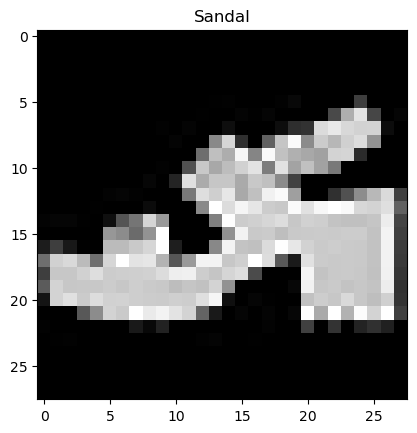

In [38]:
plt.imshow(test_samples[0].squeeze(), cmap = 'grey')
plt.title(class_names[test_labels[0]])

In [39]:
# Make predicitons 
pred_probs = make_predictions(model = model_3,
                             data = test_samples)

pred_probs[:2]

tensor([[9.9377e-08, 3.6090e-08, 1.4242e-08, 5.2163e-08, 3.7020e-09, 9.9995e-01,
         2.3754e-07, 6.2756e-06, 1.6478e-05, 3.0519e-05],
        [2.3218e-02, 5.2083e-01, 2.4539e-03, 1.5527e-01, 1.7495e-01, 2.0359e-04,
         1.1988e-01, 4.1338e-04, 2.1675e-04, 2.5578e-03]])

In [40]:
# Convert the prediction probabilities to labels

pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [41]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

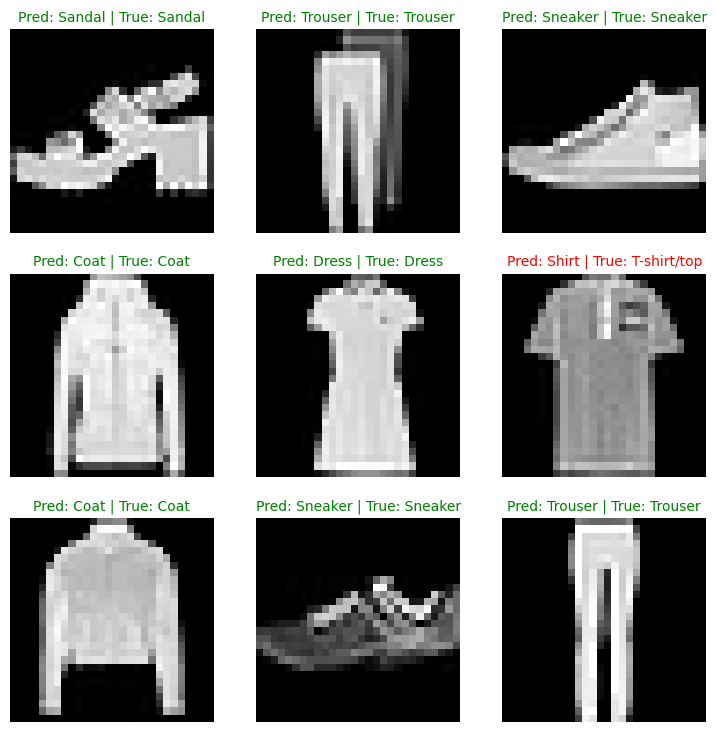

In [42]:
# Plot Predictions

plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i + 1)
    
    plt.imshow(sample.squeeze(), cmap = 'grey')
    
    pred_label = class_names[pred_classes[i]]
    
    true_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | True: {true_label}"
    
    # Green if predicted label is same as true label and red otherwise
    if pred_label == true_label:
         plt.title(title_text, fontsize = 10, c = 'g')
    else:
        plt.title(title_text, fontsize = 10 , c ='r')
    
    plt.axis(False)

### Plotting a Confusion Matrix

In [47]:
from tqdm.auto import tqdm

# Make predictions with rained model
y_preds = []
model_3.eval()

with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc = 'Making predictions'):
        X, y = X.to(device), y.to(device)
        
        y_logit = model_3(X)
        
        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
        
        y_preds.append(y_pred.cpu())

# Contenate list of predicitions into a tensor

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])

In [48]:
len(y_pred_tensor)

10000

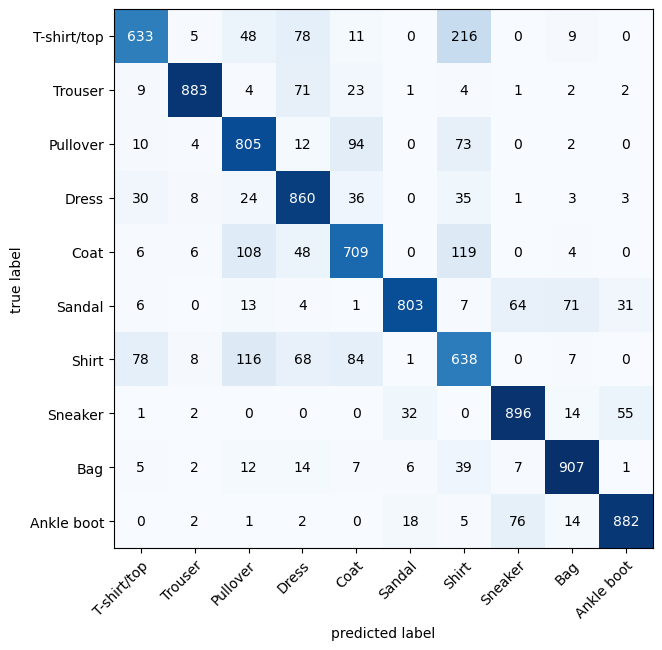

In [53]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix = ConfusionMatrix(task = 'Multiclass' , num_classes = len(class_names))
confmat_tensor = confusion_matrix(preds = y_pred_tensor, target = test_data.targets)

# Plot the Confusion Matrix
fig, ax = plot_confusion_matrix(
            conf_mat = confmat_tensor.numpy(),
            class_names = class_names,
            figsize = (10,7 ))

### Saving the CNN Model

In [55]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = 'CNN model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

# Save the model state dict
print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_3.state_dict(), f = MODEL_SAVE_PATH)

models\CNN model.pth
Saving the model to: models\CNN model.pth


In [56]:
model_3.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3081,  0.2731, -0.2665],
                        [ 0.1374,  0.1172,  0.0214],
                        [-0.4561,  0.1977,  0.4112]]],
              
              
                      [[[-0.2217,  0.3421, -0.0400],
                        [ 0.3452,  0.3376, -0.0769],
                        [-0.1016,  0.4297,  0.0080]]],
              
              
                      [[[-0.4582, -0.1553, -0.0285],
                        [-0.6689, -0.6844,  0.2186],
                        [-0.7741, -0.6174, -0.0382]]],
              
              
                      [[[-0.7651, -0.9706, -0.6415],
                        [ 0.2943, -0.7622,  0.1355],
                        [ 0.3217, -0.0112,  0.4143]]],
              
              
                      [[[ 0.0410,  0.2810, -0.1847],
                        [-0.2010,  0.3769, -0.3091],
                        [-0.0175,  0.4379,  0.1253]]],
              
              
      

 Since we saved only the model's state dict and not the entire model, we need to create a new instance of our model class

In [58]:
# Creating a new instance
torch.manual_seed(42)

loaded_model_3 = FashionMNISTModelv2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = 10)

loaded_model_3.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

loaded_model_3.to(device)

FashionMNISTModelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)